# Board games are awesome!
And we're going to find out the most awesome of qualities 

In [1]:
#data wrangle
import pandas as pd
import numpy as np
import nltk

#visualize
import matplotlib.pyplot as plt
import seaborn as sns

#py funtions
import acquire
import prepare
import explore

#filter warnings
import warnings
warnings.filterwarnings('ignore')

## Acquire

In [28]:
import os
import json

def get_games():
    filename = 'data1.txt'

    # check for presence of the file or make a new request
    if os.path.exists(filename):
        print('Data1 already exists.')
    else:
        data = acquire.scrape_search(1)
        for count in range (2,11):
            data.extend(acquire.scrape_search(count))
        with open('data1.txt', 'w') as outfile:
            json.dump(data, outfile)

    # check for presence of the file or make a new request
    if os.path.exists(filename):
        print('data2.txt already exists.')
    else:   
        data = acquire.scrape_search(11)
        for count in range (12,21):
            data.extend(acquire.scrape_search(count))
        with open('data2.txt', 'w') as outfile:
            json.dump(data, outfile)

In [29]:
get_games()

174430
the following rank has just been pulled 1
161936
the following rank has just been pulled 2
167791
the following rank has just been pulled 3
182028
the following rank has just been pulled 4
224517
the following rank has just been pulled 5
233078
the following rank has just been pulled 6
12333
the following rank has just been pulled 7
187645
the following rank has just been pulled 8
220308
the following rank has just been pulled 9
169786
the following rank has just been pulled 10
193738
the following rank has just been pulled 11
115746
the following rank has just been pulled 12
120677
the following rank has just been pulled 13
162886
the following rank has just been pulled 14
84876
the following rank has just been pulled 15
180263
the following rank has just been pulled 16
173346
the following rank has just been pulled 17
124361
the following rank has just been pulled 18
28720
the following rank has just been pulled 19
183394
the following rank has just been pulled 20
205637
the f

220877
the following rank has just been pulled 166
245638
the following rank has just been pulled 167
421
the following rank has just been pulled 168
192291
the following rank has just been pulled 169
155873
the following rank has just been pulled 170
156129
the following rank has just been pulled 171
154203
the following rank has just been pulled 172
176494
the following rank has just been pulled 173
140620
the following rank has just been pulled 174
24181
the following rank has just been pulled 175
19857
the following rank has just been pulled 176
188834
the following rank has just been pulled 177
198994
the following rank has just been pulled 178
127060
the following rank has just been pulled 179
97207
the following rank has just been pulled 180
27708
the following rank has just been pulled 181
22545
the following rank has just been pulled 182
108745
the following rank has just been pulled 183
193037
the following rank has just been pulled 184
38453
the following rank has just been 

215341
the following rank has just been pulled 329
256960
the following rank has just been pulled 330
102652
the following rank has just been pulled 331
165722
the following rank has just been pulled 332
183562
the following rank has just been pulled 333
192153
the following rank has just been pulled 334
58421
the following rank has just been pulled 335
62222
the following rank has just been pulled 336
162082
the following rank has just been pulled 337
98778
the following rank has just been pulled 338
224783
the following rank has just been pulled 339
105551
the following rank has just been pulled 340
242302
the following rank has just been pulled 341
187617
the following rank has just been pulled 342
36553
the following rank has just been pulled 343
62227
the following rank has just been pulled 344
170771
the following rank has just been pulled 345
209418
the following rank has just been pulled 346
158899
the following rank has just been pulled 347
97786
the following rank has just be

111799
the following rank has just been pulled 492
123540
the following rank has just been pulled 493
170561
the following rank has just been pulled 494
46
the following rank has just been pulled 495
68425
the following rank has just been pulled 496
158889
the following rank has just been pulled 497
79127
the following rank has just been pulled 498
13004
the following rank has just been pulled 499
18098
the following rank has just been pulled 500
168584
the following rank has just been pulled 501
167400
the following rank has just been pulled 502
24800
the following rank has just been pulled 503
179803
the following rank has just been pulled 504
154825
the following rank has just been pulled 505
2163
the following rank has just been pulled 506
55600
the following rank has just been pulled 507
73761
the following rank has just been pulled 508
234277
the following rank has just been pulled 509
31563
the following rank has just been pulled 510
107529
the following rank has just been pulle

98229
the following rank has just been pulled 655
172047
the following rank has just been pulled 656
16747
the following rank has just been pulled 657
122298
the following rank has just been pulled 658
170624
the following rank has just been pulled 659
231581
the following rank has just been pulled 660
177678
the following rank has just been pulled 661
904
the following rank has just been pulled 662
256916
the following rank has just been pulled 663
8051
the following rank has just been pulled 664
65244
the following rank has just been pulled 665
256730
the following rank has just been pulled 666
72225
the following rank has just been pulled 667
95064
the following rank has just been pulled 668
89409
the following rank has just been pulled 669
226320
the following rank has just been pulled 670
160851
the following rank has just been pulled 671
939
the following rank has just been pulled 672
158435
the following rank has just been pulled 673
174570
the following rank has just been pulle

833
the following rank has just been pulled 818
177524
the following rank has just been pulled 819
37628
the following rank has just been pulled 820
44163
the following rank has just been pulled 821
214887
the following rank has just been pulled 822
229265
the following rank has just been pulled 823
251658
the following rank has just been pulled 824
42910
the following rank has just been pulled 825
163154
the following rank has just been pulled 826
157001
the following rank has just been pulled 827
112
the following rank has just been pulled 828
229892
the following rank has just been pulled 829
187377
the following rank has just been pulled 830
121297
the following rank has just been pulled 831
23094
the following rank has just been pulled 832
216092
the following rank has just been pulled 833
17329
the following rank has just been pulled 834
30381
the following rank has just been pulled 835
140933
the following rank has just been pulled 836
91080
the following rank has just been pull

85256
the following rank has just been pulled 981
826
the following rank has just been pulled 982
47055
the following rank has just been pulled 983
216091
the following rank has just been pulled 984
23540
the following rank has just been pulled 985
126100
the following rank has just been pulled 986
1115
the following rank has just been pulled 987
878
the following rank has just been pulled 988
43022
the following rank has just been pulled 989
1897
the following rank has just been pulled 990
9220
the following rank has just been pulled 991
134453
the following rank has just been pulled 992
245643
the following rank has just been pulled 993
66
the following rank has just been pulled 994
129051
the following rank has just been pulled 995
902
the following rank has just been pulled 996
218121
the following rank has just been pulled 997
63268
the following rank has just been pulled 998
142992
the following rank has just been pulled 999
234669
the following rank has just been pulled 1000
159

6351
the following rank has just been pulled 1142
171662
the following rank has just been pulled 1143
142079
the following rank has just been pulled 1144
148951
the following rank has just been pulled 1145
113873
the following rank has just been pulled 1146
701
the following rank has just been pulled 1147
283355
the following rank has just been pulled 1148
3228
the following rank has just been pulled 1149
24773
the following rank has just been pulled 1150
168609
the following rank has just been pulled 1151
34887
the following rank has just been pulled 1152
201
the following rank has just been pulled 1153
272453
the following rank has just been pulled 1154
219100
the following rank has just been pulled 1155
146221
the following rank has just been pulled 1156
116954
the following rank has just been pulled 1157
34297
the following rank has just been pulled 1158
90040
the following rank has just been pulled 1159
6205
the following rank has just been pulled 1160
112138
the following rank ha

46396
the following rank has just been pulled 1303
54137
the following rank has just been pulled 1304
37141
the following rank has just been pulled 1305
215840
the following rank has just been pulled 1306
67254
the following rank has just been pulled 1307
239942
the following rank has just been pulled 1308
172996
the following rank has just been pulled 1309
175293
the following rank has just been pulled 1310
188547
the following rank has just been pulled 1311
172737
the following rank has just been pulled 1312
134157
the following rank has just been pulled 1313
264055
the following rank has just been pulled 1314
177478
the following rank has just been pulled 1315
254018
the following rank has just been pulled 1316
4636
the following rank has just been pulled 1317
1198
the following rank has just been pulled 1318
29223
the following rank has just been pulled 1319
24703
the following rank has just been pulled 1320
180852
the following rank has just been pulled 1321
198487
the following r

398
the following rank has just been pulled 1463
220792
the following rank has just been pulled 1464
21551
the following rank has just been pulled 1465
46255
the following rank has just been pulled 1466
214032
the following rank has just been pulled 1467
40393
the following rank has just been pulled 1468
204574
the following rank has just been pulled 1469
233571
the following rank has just been pulled 1470
36648
the following rank has just been pulled 1471
206940
the following rank has just been pulled 1472
35761
the following rank has just been pulled 1473
12166
the following rank has just been pulled 1474
284083
the following rank has just been pulled 1475
204505
the following rank has just been pulled 1476
225244
the following rank has just been pulled 1477
128898
the following rank has just been pulled 1478
118063
the following rank has just been pulled 1479
133632
the following rank has just been pulled 1480
71061
the following rank has just been pulled 1481
150293
the following r

203780
the following rank has just been pulled 1624
76150
the following rank has just been pulled 1625
162823
the following rank has just been pulled 1626
126996
the following rank has just been pulled 1627
4192
the following rank has just been pulled 1628
180564
the following rank has just been pulled 1629
39927
the following rank has just been pulled 1630
83667
the following rank has just been pulled 1631
189052
the following rank has just been pulled 1632
137031
the following rank has just been pulled 1633
270673
the following rank has just been pulled 1634
811
the following rank has just been pulled 1635
153318
the following rank has just been pulled 1636
94480
the following rank has just been pulled 1637
205158
the following rank has just been pulled 1638
40529
the following rank has just been pulled 1639
384
the following rank has just been pulled 1640
156138
the following rank has just been pulled 1641
192802
the following rank has just been pulled 1642
18748
the following rank 

the following rank has just been pulled 1784
63170
the following rank has just been pulled 1785
23107
the following rank has just been pulled 1786
80771
the following rank has just been pulled 1787
20
the following rank has just been pulled 1788
145645
the following rank has just been pulled 1789
91523
the following rank has just been pulled 1790
142296
the following rank has just been pulled 1791
175549
the following rank has just been pulled 1792
2476
the following rank has just been pulled 1793
145633
the following rank has just been pulled 1794
3870
the following rank has just been pulled 1795
41429
the following rank has just been pulled 1796
3972
the following rank has just been pulled 1797
2533
the following rank has just been pulled 1798
118705
the following rank has just been pulled 1799
173105
the following rank has just been pulled 1800
4491
the following rank has just been pulled 1801
166317
the following rank has just been pulled 1802
31479
the following rank has just been

140717
the following rank has just been pulled 1945
172552
the following rank has just been pulled 1946
4688
the following rank has just been pulled 1947
1334
the following rank has just been pulled 1948
171479
the following rank has just been pulled 1949
75212
the following rank has just been pulled 1950
216600
the following rank has just been pulled 1951
181819
the following rank has just been pulled 1952
25729
the following rank has just been pulled 1953
119637
the following rank has just been pulled 1954
883
the following rank has just been pulled 1955
133528
the following rank has just been pulled 1956
171890
the following rank has just been pulled 1957
102104
the following rank has just been pulled 1958
145976
the following rank has just been pulled 1959
16216
the following rank has just been pulled 1960
143157
the following rank has just been pulled 1961
169464
the following rank has just been pulled 1962
805
the following rank has just been pulled 1963
32116
the following rank 

The dataset was created by webscrapping BoardGameGeek.com. This website has an api where the majority of values were pulled from. The actual rankings and ratings were not contained in the api and were therefore pulled from the browse page. 

The top 2000 games and their respective attributes were pulled and saved to a .csv file, which is linked in the readme. 

In [33]:
with open('data1.txt') as f:
    data1 = json.load(f)

In [40]:
pd.DataFrame(data1)

,name_clean,rank,geek_rating,avg_rating,votes,name,year,min_players,max_players,min_time,max_time,designer,category,mechanic,publisher,description
0,Gloomhaven,1,\n\t\t\t8.587\t\t,\n\t\t\t8.86\t\t,\n\t\t\t30331\t\t,Gloomhaven,2017,1,4,60,120,Isaac Childres,"[Adventure, Exploration, Fantasy, Fighting, Mi...","[Campaign / Battle Card Driven, Cooperative Ga...","[Cephalofair Games, Albi, Asmodee, Feuerland S...",Gloomhaven is a game of Euro-inspired tactica...
1,Pandemic Legacy: Season 1,2,\n\t\t\t8.472\t\t,\n\t\t\t8.62\t\t,\n\t\t\t34208\t\t,Pandemic Legacy: Season 1,2015,2,4,60,60,Rob Daviau,"[Environmental, Medical]","[Action Points, Cooperative Game, Hand Managem...","[Z-Man Games, Inc., Asterion Press, Devir, Fil...",Pandemic Legacy is a co-operative campaign gam...
2,Terraforming Mars,3,\n\t\t\t8.261\t\t,\n\t\t\t8.42\t\t,\n\t\t\t46979\t\t,Terraforming Mars,2016,1,5,120,120,Jacob Fryxelius,"[Economic, Environmental, Industry / Manufactu...","[Card Drafting, End Game Bonuses, Hand Managem...","[FryxGames, Arclight, Fantasmagoria, Ghenos Ga...","In the 2400s, mankind begins to terraform the ..."
3,Through the Ages: A New Story of Civilization,4,\n\t\t\t8.240\t\t,\n\t\t\t8.50\t\t,\n\t\t\t17969\t\t,Through the Ages: A New Story of Civilization,2015,2,4,120,120,Vlaada Chvátil,"[Card Game, Civilization, Economic]","[Action Points, Auction/Bidding, Auction: Dutc...","[Czech Games Edition, Cranio Creations, Devir,...",Through the Ages: A New Story of Civilization ...
4,Brass: Birmingham,5,\n\t\t\t8.191\t\t,\n\t\t\t8.62\t\t,\n\t\t\t9476\t\t,Brass: Birmingham,2018,2,4,60,120,Gavan Brown,"[Economic, Industry / Manufacturing, Transport...","[Hand Management, Income, Loans, Market, Netwo...","[Roxley, BoardM Factory, Conclave Editora, Cro...",Brass: Birmingham is an economic strategy game...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Meuterer,996,\n\t\t\t6.481\t\t,\n\t\t\t6.90\t\t,\n\t\t\t3174\t\t,Meuterer,2000,3,4,60,60,Marcel-André Casasola Merkle,"[Card Game, Fighting, Nautical, Pirates]","[Card Drafting, Hand Management, Modular Board...",[Adlung-Spiele],Meuterer is a role selection card game in whic...
996,Dice Hospital,997,\n\t\t\t6.480\t\t,\n\t\t\t7.20\t\t,\n\t\t\t1922\t\t,Dice Hospital,2018,1,4,45,90,Stan Kordonskiy,"[Dice, Medical]","[Action Points, Dice Rolling, Variable Phase O...","[Alley Cat Games, Kobold Spieleverlag, Maldito...","In Dice Hospital, a worker placement game, pla..."
997,Spot it!,998,\n\t\t\t6.480\t\t,\n\t\t\t6.66\t\t,\n\t\t\t10350\t\t,Spot it!,2009,2,8,15,15,Denis Blanchot,"[Card Game, Children's Game, Educational, Part...",[Pattern Recognition],"[ADC Blackfire Entertainment, Asmodee, Asmodee...","Spot it!, a.k.a. Dobble, is a simple pattern r..."
998,Gravwell: Escape from the 9th Dimension,999,\n\t\t\t6.478\t\t,\n\t\t\t6.93\t\t,\n\t\t\t3052\t\t,Gravwell: Escape from the 9th Dimension,2013,1,4,20,35,Corey Young,"[Card Game, Science Fiction]","[Action Queue, Card Drafting, Simultaneous Act...","[Cryptozoic Entertainment, Renegade Game Studios]","In Gravwell: Escape from the 9th Dimension, pl..."


In [18]:
# games = []
games.append(acquire.scrape_one_game("https://www.boardgamegeek.com/xmlapi2/thing?id=167791"))

In [24]:
games[0]['category'][0]

'Environmental'

In [20]:
pd.DataFrame(games, index='rank')

,name,year,min_players,max_players,min_time,max_time,designer,category,mechanic,publisher,description
0,Pandemic Legacy: Season 1,2015,2,4,60,60,Rob Daviau,"[Environmental, Medical]","[Action Points, Cooperative Game, Hand Managem...","[Z-Man Games, Inc., Asterion Press, Devir, Fil...",Pandemic Legacy is a co-operative campaign gam...
1,Terraforming Mars,2016,1,5,120,120,Jacob Fryxelius,"[Economic, Environmental, Industry / Manufactu...","[Card Drafting, End Game Bonuses, Hand Managem...","[FryxGames, Arclight, Fantasmagoria, Ghenos Ga...","In the 2400s, mankind begins to terraform the ..."


In [17]:
pd.read_csv("top2000games.csv", index_col='rank')

,name_clean,geek_rating,avg_rating,votes,name,year,min_players,max_players,min_time,max_time,designer,category,mechanic,publisher,description
rank,,,,,,,,,,,,,,,
1,Gloomhaven,8.587,8.86,30159,Gloomhaven,2017,1,4,60,120,Isaac Childres,"['Adventure', 'Exploration', 'Fantasy', 'Fight...","['Campaign / Battle Card Driven', 'Cooperative...","['Cephalofair Games', 'Albi', 'Asmodee', 'Feue...",Gloomhaven is a game of Euro-inspired tactica...
2,Pandemic Legacy: Season 1,8.473,8.63,34114,Pandemic Legacy: Season 1,2015,2,4,60,60,Rob Daviau,"['Environmental', 'Medical']","['Action Points', 'Cooperative Game', 'Hand Ma...","['Z-Man Games, Inc.', 'Asterion Press', 'Devir...",Pandemic Legacy is a co-operative campaign gam...
3,Terraforming Mars,8.261,8.42,46739,Terraforming Mars,2016,1,5,120,120,Jacob Fryxelius,"['Economic', 'Environmental', 'Industry / Manu...","['Card Drafting', 'End Game Bonuses', 'Hand Ma...","['FryxGames', 'Arclight', 'Fantasmagoria', 'Gh...","In the 2400s, mankind begins to terraform the ..."
4,Through the Ages: A New Story of Civilization,8.239,8.50,17888,Through the Ages: A New Story of Civilization,2015,2,4,120,120,Vlaada Chvátil,"['Card Game', 'Civilization', 'Economic']","['Action Points', 'Auction/Bidding', 'Auction:...","['Czech Games Edition', 'Cranio Creations', 'D...",Through the Ages: A New Story of Civilization ...
5,Brass: Birmingham,8.187,8.62,9358,Brass: Birmingham,2018,2,4,60,120,Gavan Brown,"['Economic', 'Industry / Manufacturing', 'Tran...","['Hand Management', 'Income', 'Loans', 'Market...","['Roxley', 'BoardM Factory', 'Conclave Editora...",Brass: Birmingham is an economic strategy game...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,Space Dealer,6.071,6.55,1624,Space Dealer,2006,3,4,30,30,Tobias Stapelfeldt,"['City Building', 'Real-time', 'Science Fictio...","['Pick-up and Deliver', 'Point to Point Moveme...","['eggertspiele', 'JKLM Games', 'Pegasus Spiele...",Space Dealer is played in real time to a 30-mi...
1997,Monopoly Deal Card Game,6.071,6.27,7531,Monopoly Deal Card Game,2008,2,5,15,15,(Uncredited),"['Card Game', 'Economic']","['Hand Management', 'Set Collection', 'Take Th...","['ASS Altenburger Spielkarten', 'Basic Fun, In...","(from the box):&#10;The fast-paced, addictive ..."
1998,1849: The Game of Sicilian Railways,6.071,8.19,348,1849: The Game of Sicilian Railways,1998,3,5,180,180,Chris Lawson,"['Economic', 'Trains', 'Transportation']","['Auction/Bidding', 'Network and Route Buildin...","['All-Aboard Games', 'Chris Lawson']","Although dubbed a game-kit, this 18xx offering..."


In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 1 to 2000
Data columns (total 15 columns):
name_clean     2000 non-null object
geek_rating    2000 non-null float64
avg_rating     2000 non-null float64
votes          2000 non-null int64
name           2000 non-null object
year           2000 non-null int64
min_players    2000 non-null int64
max_players    2000 non-null int64
min_time       2000 non-null int64
max_time       2000 non-null int64
designer       2000 non-null object
category       2000 non-null object
mechanic       2000 non-null object
publisher      2000 non-null object
description    2000 non-null object
dtypes: float64(2), int64(6), object(7)
memory usage: 250.0+ KB


,name_clean,geek_rating,avg_rating,votes,name,year,min_players,max_players,min_time,max_time,designer,category,mechanic,publisher,description
rank,,,,,,,,,,,,,,,
1,Gloomhaven,8.587,8.86,30159,Gloomhaven,2017,1,4,60,120,Isaac Childres,"['Adventure', 'Exploration', 'Fantasy', 'Fight...","['Campaign / Battle Card Driven', 'Cooperative...","['Cephalofair Games', 'Albi', 'Asmodee', 'Feue...",Gloomhaven is a game of Euro-inspired tactica...
2,Pandemic Legacy: Season 1,8.473,8.63,34114,Pandemic Legacy: Season 1,2015,2,4,60,60,Rob Daviau,"['Environmental', 'Medical']","['Action Points', 'Cooperative Game', 'Hand Ma...","['Z-Man Games, Inc.', 'Asterion Press', 'Devir...",Pandemic Legacy is a co-operative campaign gam...
3,Terraforming Mars,8.261,8.42,46739,Terraforming Mars,2016,1,5,120,120,Jacob Fryxelius,"['Economic', 'Environmental', 'Industry / Manu...","['Card Drafting', 'End Game Bonuses', 'Hand Ma...","['FryxGames', 'Arclight', 'Fantasmagoria', 'Gh...","In the 2400s, mankind begins to terraform the ..."
4,Through the Ages: A New Story of Civilization,8.239,8.50,17888,Through the Ages: A New Story of Civilization,2015,2,4,120,120,Vlaada Chvátil,"['Card Game', 'Civilization', 'Economic']","['Action Points', 'Auction/Bidding', 'Auction:...","['Czech Games Edition', 'Cranio Creations', 'D...",Through the Ages: A New Story of Civilization ...
5,Brass: Birmingham,8.187,8.62,9358,Brass: Birmingham,2018,2,4,60,120,Gavan Brown,"['Economic', 'Industry / Manufacturing', 'Tran...","['Hand Management', 'Income', 'Loans', 'Market...","['Roxley', 'BoardM Factory', 'Conclave Editora...",Brass: Birmingham is an economic strategy game...


## Prepare

Since the list of attributes were pulled from two different locations (the browse page and the game's individual api), compare the names from both locations to ensure they match.

In [4]:
df [df.name_clean != df.name]

,name_clean,geek_rating,avg_rating,votes,name,year,min_players,max_players,min_time,max_time,designer,category,mechanic,publisher,description
rank,,,,,,,,,,,,,,,
101,War of the Ring (First Edition),7.455,7.77,9584,War of the Ring,2004,2,4,120,120,Roberto Di Meglio,"['Adventure', 'Fantasy', 'Miniatures', 'Novel-...","['Action Points', 'Area Majority / Influence',...","['Ares Games', 'Asmodee', 'Devir', 'Fantasy Fl...","In War of the Ring, one player takes control o..."
1400,\nCarrom\n,6.282,7.00,1467,Carrom,0,2,4,60,60,(Uncredited),['Action / Dexterity'],"['Flicking', 'Team-Based Game']","['(Public Domain)', '(Unknown)', 'ABRA', 'ASS ...",Carrom is most easily described as &quot;finge...


> For Carrom, the name column should be retained. The War of the Ring game will be further investigated. 

In [5]:
df [df.name_clean.str.startswith("War of the Ring")]

,name_clean,geek_rating,avg_rating,votes,name,year,min_players,max_players,min_time,max_time,designer,category,mechanic,publisher,description
rank,,,,,,,,,,,,,,,
12,War of the Ring (Second Edition),8.060,8.45,10955,War of the Ring (Second Edition),2012,2,4,150,180,Roberto Di Meglio,"['Adventure', 'Fantasy', 'Fighting', 'Miniatur...","['Action Drafting', 'Area Majority / Influence...","['Ares Games', 'Angry Lion Games', 'Devir', 'G...","In War of the Ring, one player takes control o..."
101,War of the Ring (First Edition),7.455,7.77,9584,War of the Ring,2004,2,4,120,120,Roberto Di Meglio,"['Adventure', 'Fantasy', 'Miniatures', 'Novel-...","['Action Points', 'Area Majority / Influence',...","['Ares Games', 'Asmodee', 'Devir', 'Fantasy Fl...","In War of the Ring, one player takes control o..."


> For 'War of the Ring (First Edition)', the name_clean should be retained

In [6]:
# replace War of the Ring "name" with "name_clean"
df.name.iloc[100] = df.name_clean.iloc[100]

# drop "name_clean" column
df.drop('name_clean', axis=1, inplace=True)

# this moves the "name" column to the beginning
df.insert(0,'name',df.pop("name"))

In [8]:
df.head()

,name,geek_rating,avg_rating,votes,year,min_players,max_players,min_time,max_time,designer,category,mechanic,publisher,description
rank,,,,,,,,,,,,,,
1,Gloomhaven,8.587,8.86,30159,2017,1,4,60,120,Isaac Childres,"['Adventure', 'Exploration', 'Fantasy', 'Fight...","['Campaign / Battle Card Driven', 'Cooperative...","['Cephalofair Games', 'Albi', 'Asmodee', 'Feue...",Gloomhaven is a game of Euro-inspired tactica...
2,Pandemic Legacy: Season 1,8.473,8.63,34114,2015,2,4,60,60,Rob Daviau,"['Environmental', 'Medical']","['Action Points', 'Cooperative Game', 'Hand Ma...","['Z-Man Games, Inc.', 'Asterion Press', 'Devir...",Pandemic Legacy is a co-operative campaign gam...
3,Terraforming Mars,8.261,8.42,46739,2016,1,5,120,120,Jacob Fryxelius,"['Economic', 'Environmental', 'Industry / Manu...","['Card Drafting', 'End Game Bonuses', 'Hand Ma...","['FryxGames', 'Arclight', 'Fantasmagoria', 'Gh...","In the 2400s, mankind begins to terraform the ..."
4,Through the Ages: A New Story of Civilization,8.239,8.50,17888,2015,2,4,120,120,Vlaada Chvátil,"['Card Game', 'Civilization', 'Economic']","['Action Points', 'Auction/Bidding', 'Auction:...","['Czech Games Edition', 'Cranio Creations', 'D...",Through the Ages: A New Story of Civilization ...
5,Brass: Birmingham,8.187,8.62,9358,2018,2,4,60,120,Gavan Brown,"['Economic', 'Industry / Manufacturing', 'Tran...","['Hand Management', 'Income', 'Loans', 'Market...","['Roxley', 'BoardM Factory', 'Conclave Editora...",Brass: Birmingham is an economic strategy game...


In [12]:
print(f'There are {len(df)} games in the dataset. There are {df.name.nunique()} unique games in the datasets.')

There are 2000 games in the dataset. There are 1993 unique games in the datasets.


> These values should match and they do not. Investigate further. 

In [13]:
df [df.duplicated()]

,name,geek_rating,avg_rating,votes,year,min_players,max_players,min_time,max_time,designer,category,mechanic,publisher,description
rank,,,,,,,,,,,,,,
1601,Waggle Dance,6.202,7.02,1164,2014,2,4,30,90,Mike Nudd,"['Animals', 'Dice', 'Environmental']","['Dice Rolling', 'Set Collection', 'Worker Pla...",['Grublin Games Publishing'],"Build a beehive, collect nectar, and make hone..."


In [14]:
df [df.name == "Waggle Dance"]

,name,geek_rating,avg_rating,votes,year,min_players,max_players,min_time,max_time,designer,category,mechanic,publisher,description
rank,,,,,,,,,,,,,,
1600,Waggle Dance,6.202,7.02,1164,2014,2,4,30,90,Mike Nudd,"['Animals', 'Dice', 'Environmental']","['Dice Rolling', 'Set Collection', 'Worker Pla...",['Grublin Games Publishing'],"Build a beehive, collect nectar, and make hone..."
1601,Waggle Dance,6.202,7.02,1164,2014,2,4,30,90,Mike Nudd,"['Animals', 'Dice', 'Environmental']","['Dice Rolling', 'Set Collection', 'Worker Pla...",['Grublin Games Publishing'],"Build a beehive, collect nectar, and make hone..."


> This game is exactly duplicated and will be dropped from the dataset. 

In [18]:
df.drop(index=1601, inplace=True)

In [22]:
df [df.name.duplicated(keep=False)].sort_values("name")

,name,geek_rating,avg_rating,votes,year,min_players,max_players,min_time,max_time,designer,category,mechanic,publisher,description
rank,,,,,,,,,,,,,,
1205,Axis & Allies,6.366,6.71,5648,2004,2,5,240,240,"Larry Harris, Jr.","['Economic', 'Wargame', 'World War II']","['Area Movement', 'Dice Rolling', 'Team-Based ...","['Avalon Hill Games, Inc.', 'Tilsit']",Axis &amp; Allies (2004) aka Axis &amp; Allies...
1326,Axis & Allies,6.308,6.56,9838,1981,2,5,180,180,"Larry Harris, Jr.","['Economic', 'Wargame', 'World War II']","['Area Movement', 'Dice Rolling', 'Minimap Res...","['Jedko Games', 'Milton Bradley', 'Nova Game D...",Axis and Allies is the most successful of Milt...
368,Citadels,6.993,7.09,45090,2000,2,8,20,60,Bruno Faidutti,"['Bluffing', 'Card Game', 'City Building', 'De...","['Action Drafting', 'Card Drafting', 'Set Coll...","['Hans im Glück', '(Unknown)', '999 Games', 'A...","In Citadels, players take on new roles each ro..."
480,Citadels,6.876,7.35,4835,2016,2,8,30,60,Bruno Faidutti,"['Bluffing', 'Card Game', 'City Building', 'Fa...","['Card Drafting', 'Set Collection', 'Turn Orde...","['(Unknown)', '999 Games', 'Asmodee', 'Delta V...","In Citadels, players take on new roles each ro..."
128,Cosmic Encounter,7.386,7.55,25080,2008,3,5,60,120,Bill Eberle,"['Bluffing', 'Negotiation', 'Science Fiction',...","['Alliances', 'Auction/Bidding', 'Hand Managem...","['Fantasy Flight Games', 'Arclight', 'Asterion...",From the Manufacturer&#10;&#10;Build a galacti...
972,Cosmic Encounter,6.493,6.92,3779,1977,2,6,90,90,Bill Eberle,"['Bluffing', 'Negotiation', 'Science Fiction']","['Hand Management', 'Variable Player Powers']","['Eon', 'Alga', 'ASS Altenburger Spielkarten',...","By request of Fantasy Flight Games, Board Game..."
1640,Cosmic Encounter,6.188,7.20,956,1991,3,6,60,60,Bill Eberle,"['Bluffing', 'Card Game', 'Science Fiction']",['Variable Player Powers'],"['Hexagames (I)', 'Mayfair Games']",Players represent alien races that are seeking...
257,Dune,7.137,7.62,5229,1979,2,6,60,180,Bill Eberle,"['Bluffing', 'Fighting', 'Negotiation', 'Novel...","['Alliances', 'Area Majority / Influence', 'Ar...","['The Avalon Hill Game Co', 'Descartes Editeur...","Set thousands of years in the future, Dune the..."
1201,Dune,6.368,8.38,723,2019,2,6,120,120,Bill Eberle,['Science Fiction'],"['Alliances', 'Area Majority / Influence', 'Au...","['Gale Force Nine, LLC']",Imagine you can control the forces of a noble ...


> These games have repeated names, but different release years and ratings, implying different editions. All of these duplciates will be retained. 

In [21]:
df.description

rank
1       Gloomhaven  is a game of Euro-inspired tactica...
2       Pandemic Legacy is a co-operative campaign gam...
3       In the 2400s, mankind begins to terraform the ...
4       Through the Ages: A New Story of Civilization ...
5       Brass: Birmingham is an economic strategy game...
                              ...                        
1996    Space Dealer is played in real time to a 30-mi...
1997    (from the box):&#10;The fast-paced, addictive ...
1998    Although dubbed a game-kit, this 18xx offering...
1999    Based on the well-known Settlers of Catan, thi...
2000    1931: Your scientific expedition discovers a n...
Name: description, Length: 1999, dtype: object

The description will be cleaned up for natural language processing using the following functions.

`prepare.basic_clean`
- text is lowercased
- text is normalizes all special characters
- anything that is not a character, number, whitespace or apostrophe is removed
- new lines and returns are replaced with a space

`prepare.remove_stopwords`
- removes stop words found in the standard stopword list
- returns string of words

`prepare.lemmatize`
- lemmatizes applicable words

In [23]:
df.description = df.description.apply(prepare.basic_clean).apply(prepare.remove_stopwords).apply(prepare.lemmatize)

In [25]:
df.description

rank
1       gloomhaven game euroinspired tactical combat p...
2       pandemic legacy cooperative campaign game over...
3       2400s mankind begin terraform planet mar giant...
4       age new story civilization new edition age sto...
5       brass birmingham economic strategy game sequel...
                              ...                        
1996    space dealer played real time 30minute soundtr...
1997    box10the fastpaced addictive card game luck ch...
1998    although dubbed gamekit 18xx offering topnotch...
1999    based wellknown settler catan standalone game ...
2000    1931 scientific expedition discovers new intri...
Name: description, Length: 1999, dtype: object

## Explore

Investigate the values in each of the columns

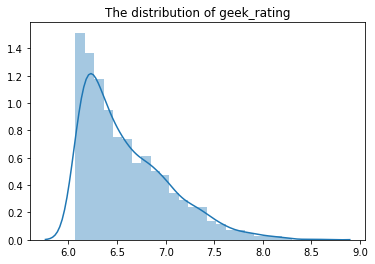

(6.066, 6.322]    704
(6.322, 6.573]    441
(6.573, 6.825]    323
(6.825, 7.077]    236
(7.077, 7.328]    139
(7.328, 7.58]      89
(7.58, 7.832]      37
(7.832, 8.084]     19
(8.084, 8.335]      9
(8.335, 8.587]      2
Name: geek_rating, dtype: int64


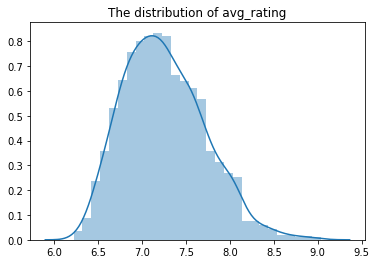

(6.215999999999999, 6.502]     60
(6.502, 6.784]                265
(6.784, 7.066]                438
(7.066, 7.348]                455
(7.348, 7.63]                 361
(7.63, 7.912]                 239
(7.912, 8.194]                125
(8.194, 8.476]                 34
(8.476, 8.758]                 16
(8.758, 9.04]                   6
Name: avg_rating, dtype: int64


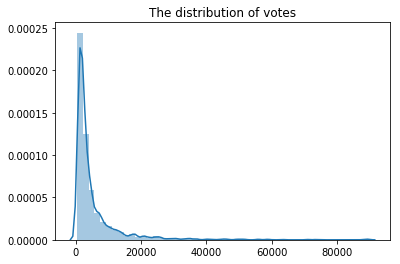

(238.67, 9260.9]      1716
(9260.9, 18193.8]      173
(18193.8, 27126.7]      61
(27126.7, 36059.6]      21
(36059.6, 44992.5]       9
(44992.5, 53925.4]       9
(53925.4, 62858.3]       4
(62858.3, 71791.2]       2
(71791.2, 80724.1]       1
(80724.1, 89657.0]       3
Name: votes, dtype: int64


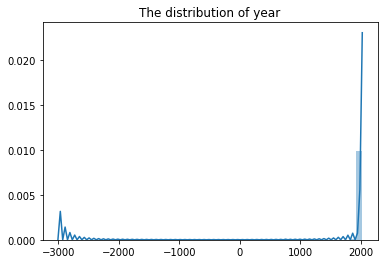

(-3005.02, -2498.1]       1
(-2498.1, -1996.2]        1
(-1996.2, -1494.3]        0
(-1494.3, -992.4]         0
(-992.4, -490.5]          0
(-490.5, 11.4]            1
(11.4, 513.3]             0
(513.3, 1015.2]           1
(1015.2, 1517.1]          1
(1517.1, 2019.0]       1994
Name: year, dtype: int64


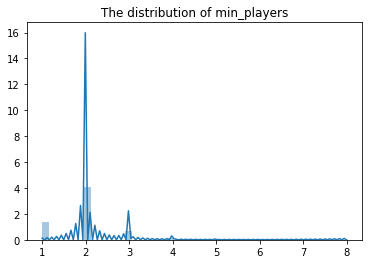

(0.992, 1.7]     429
(1.7, 2.4]      1299
(2.4, 3.1]       223
(3.1, 3.8]         0
(3.8, 4.5]        37
(4.5, 5.2]         7
(5.2, 5.9]         0
(5.9, 6.6]         2
(6.6, 7.3]         0
(7.3, 8.0]         2
Name: min_players, dtype: int64


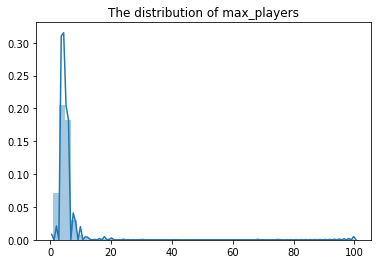

(0.9, 10.9]      1962
(10.9, 20.8]       27
(20.8, 30.7]        2
(30.7, 40.6]        0
(40.6, 50.5]        0
(50.5, 60.4]        0
(60.4, 70.3]        1
(70.3, 80.2]        1
(80.2, 90.1]        0
(90.1, 100.0]       6
Name: max_players, dtype: int64


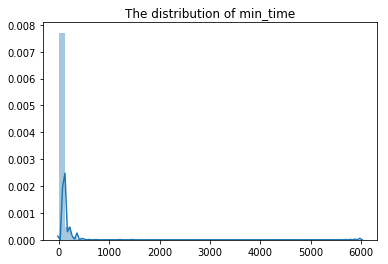

(-5.0, 600.9]       1995
(600.9, 1200.8]        2
(1200.8, 1800.7]       1
(1800.7, 2400.6]       0
(2400.6, 3000.5]       0
(3000.5, 3600.4]       0
(3600.4, 4200.3]       0
(4200.3, 4800.2]       0
(4800.2, 5400.1]       0
(5400.1, 6000.0]       1
Name: min_time, dtype: int64


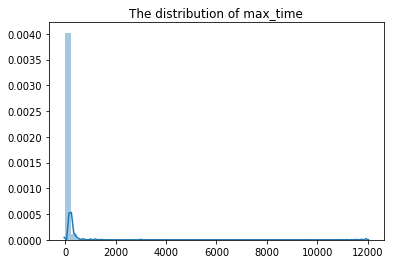

(-9.998999999999999, 1201.8]    1995
(1201.8, 2401.6]                   1
(2401.6, 3601.4]                   1
(3601.4, 4801.2]                   0
(4801.2, 6001.0]                   1
(6001.0, 7200.8]                   0
(7200.8, 8400.6]                   0
(8400.6, 9600.4]                   0
(9600.4, 10800.2]                  0
(10800.2, 12000.0]                 1
Name: max_time, dtype: int64


In [41]:
for col in df.select_dtypes(np.number).columns:
    sns.distplot(df[col])
    plt.title(f"The distribution of {col}")
    plt.xlabel("")
    plt.show()
    print(df[col].value_counts(bins=10, sort=False))

> To further investigate:
    - board games with years in the negative
    - what board games have max players over 20 people? sounds like it wouldn't fit on a board
    - what board game has a minimum time of 6000 minutes?! 

#### Board games with negative years

In [46]:
df [df.year < 1400]

,name,geek_rating,avg_rating,votes,year,min_players,max_players,min_time,max_time,designer,category,mechanic,publisher,description
rank,,,,,,,,,,,,,,
150,Go,7.343,7.64,13691,-2200,2,2,30,180,(Uncredited),['Abstract Strategy'],['Enclosure'],"['(Public Domain)', '(Self-Published)', '(Unkn...",appearance two player taking turn laying stone...
1215,Backgammon,6.360,6.53,10625,-3000,2,2,30,30,(Uncredited),"['Abstract Strategy', 'Dice']","['Betting and Bluffing', 'Dice Rolling', 'Roll...","['(Public Domain)', '(Unknown)', '3M', 'Alga',...",backgammon classic abstract strategy game dati...
1224,Xiangqi,6.354,7.14,1738,762,2,2,60,60,(Uncredited),['Abstract Strategy'],['Grid Movement'],"['(Public Domain)', '(Unknown)', 'Carlton Book...",xiangqi one played board game world translated...
1400,Carrom,6.282,7.00,1467,0,2,4,60,60,(Uncredited),['Action / Dexterity'],"['Flicking', 'Team-Based Game']","['(Public Domain)', '(Unknown)', 'ABRA', 'ASS ...",carrom easily described quotfinger poolquot 29...


I thought these were typos. 
- Go definitely originated in BC time. Documents state origin times between 2000 and 5000 years ago
- Research states that backgammon is about 5000 years old
- Xiangpi also appears to be in the correct range.
- It is unknown when Carrom originated. It became popular in the 19th century, but is believed to have been around much longer. 

> All year dates will be left as is. They are obvious outliers and may be removed later, or appropriately scaled. 

#### Board games with a high number of max players

In [48]:
df [df.max_players > 20]

,name,geek_rating,avg_rating,votes,year,min_players,max_players,min_time,max_time,designer,category,mechanic,publisher,description
rank,,,,,,,,,,,,,,
135,Welcome To...,7.373,7.65,9934,2018,1,100,25,25,Benoit Turpin,['City Building'],"['Paper-and-Pencil', 'Pattern Building']","['Blue Cocker Games', 'Broadway Toys LTD', 'De...",architect welcome want build best new town uni...
641,Ricochet Robots,6.743,7.00,7457,1999,1,99,30,30,Alex Randolph,"['Abstract Strategy', 'Maze', 'Puzzle', 'Real-...","['Grid Movement', 'Modular Board']","['Hans im Glück', 'ABACUSSPIELE', 'Devir', 'Gé...",ricochet robot le game puzzle explains there's...
674,Cartographers: A Roll Player Tale,6.709,7.67,1782,2019,1,100,30,45,Jordy Adan,"['Fantasy', 'Territory Building']","['Line Drawing', 'Paper-and-Pencil']","['Thunderworks Games', 'Gen-X Games', 'Grok Ga...",queen gimnax ordered reclamation northern land...
813,Two Rooms and a Boom,6.604,7.04,3815,2013,6,30,7,20,Alan Gerding,"['Bluffing', 'Card Game', 'Deduction', 'Negoti...","['Acting', 'Team-Based Game', 'Variable Player...",['Tuesday Knight Games'],two room boom ndash social deductionhidden rol...
844,Ultimate Werewolf: Ultimate Edition,6.581,7.05,3552,2008,5,68,30,90,Ted Alspach,"['Bluffing', 'Card Game', 'Deduction', 'Horror...","['Player Elimination', 'Role Playing', 'Team-B...","['Bézier Games', 'Arclight', 'Ediciones MasQue...",quiet little 16th century village suddenly bec...
869,Eat Poop You Cat,6.564,7.48,1525,1984,3,99,20,20,(Uncredited),"['Humor', 'Party Game']",['Paper-and-Pencil'],['(Public Domain)'],player start piece paper pencil top paper play...
1167,Star Trek: Attack Wing,6.386,7.53,1754,2013,2,99,60,60,Christopher Guild,"['Aviation / Flight', 'Miniatures', 'Movies / ...","['Action Queue', 'Dice Rolling', 'Simultaneous...",['WizKids'],game description publisher1010star trek attack...
1431,Werewolf,6.268,6.57,4178,1986,8,24,60,60,Dimitry Davidoff,"['Bluffing', 'Deduction', 'Horror', 'Murder/My...","['Alliances', 'Hidden Roles', 'Negotiation', '...","['(Public Domain)', '(Self-Published)', '(Web ...",werewolf take place small village haunted were...
1541,Ultimate Werewolf: Deluxe Edition,6.223,7.14,1343,2014,5,75,30,30,Ted Alspach,"['Bluffing', 'Card Game', 'Deduction', 'Horror...","['Player Elimination', 'Role Playing', 'Team-B...","['Bézier Games', 'Siam Board Games']",ultimate werewolf interactive game deduction t...


#### Board games with high minimum times 

In [56]:
df [df.min_time > 600]

,name,geek_rating,avg_rating,votes,year,min_players,max_players,min_time,max_time,designer,category,mechanic,publisher,description
rank,,,,,,,,,,,,,,
1121,The Civil War,6.410,7.67,1092,1983,2,2,1200,1200,Eric Lee Smith,"['American Civil War', 'Civil War', 'Post-Napo...","['Dice Rolling', 'Hexagon Grid', 'Simulation']",['Victory Games (I)'],sprawling rendition american civil war try fit...
1155,Europe Engulfed,6.389,7.50,1246,2003,2,3,720,720,Jesse Evans,"['Wargame', 'World War II']","['Action Points', 'Area Movement', 'Dice Rolli...",['GMT Games'],gmt website1010more thirteen year design devel...
1162,Empires in Arms,6.388,7.57,1179,1983,2,7,6000,12000,Greg Pinder,"['Economic', 'Napoleonic', 'Negotiation', 'Pol...","['Area Movement', 'Dice Rolling', 'Secret Unit...","['Australian Design Group', 'The Avalon Hill G...",back box avalon hill edition1010empires arm ga...
1661,Rise and Decline of the Third Reich,6.181,6.85,1746,1974,2,6,1440,1440,Don Greenwood,"['Negotiation', 'Political', 'Wargame', 'World...","['Dice Rolling', 'Hexagon Grid', 'Simulation']","['The Avalon Hill Game Co', 'Hobby Japan']",rise decline third reich realistic simulation ...


> What is 'Empire in Arms' and why would anyone play such a long game? 

#### Feature Engineering

In [91]:
explore.description_length(df)

,name,geek_rating,avg_rating,votes,year,min_players,max_players,min_time,max_time,designer,category,mechanic,publisher,description,desc_length
rank,,,,,,,,,,,,,,,
1,Gloomhaven,8.587,8.86,30159,2017,1,4,60,120,Isaac Childres,"['Adventure', 'Exploration', 'Fantasy', 'Fight...","['Campaign / Battle Card Driven', 'Cooperative...","['Cephalofair Games', 'Albi', 'Asmodee', 'Feue...",gloomhaven game euroinspired tactical combat p...,136
2,Pandemic Legacy: Season 1,8.473,8.63,34114,2015,2,4,60,60,Rob Daviau,"['Environmental', 'Medical']","['Action Points', 'Cooperative Game', 'Hand Ma...","['Z-Man Games, Inc.', 'Asterion Press', 'Devir...",pandemic legacy cooperative campaign game over...,176
3,Terraforming Mars,8.261,8.42,46739,2016,1,5,120,120,Jacob Fryxelius,"['Economic', 'Environmental', 'Industry / Manu...","['Card Drafting', 'End Game Bonuses', 'Hand Ma...","['FryxGames', 'Arclight', 'Fantasmagoria', 'Gh...",2400s mankind begin terraform planet mar giant...,280
4,Through the Ages: A New Story of Civilization,8.239,8.50,17888,2015,2,4,120,120,Vlaada Chvátil,"['Card Game', 'Civilization', 'Economic']","['Action Points', 'Auction/Bidding', 'Auction:...","['Czech Games Edition', 'Cranio Creations', 'D...",age new story civilization new edition age sto...,144
5,Brass: Birmingham,8.187,8.62,9358,2018,2,4,60,120,Gavan Brown,"['Economic', 'Industry / Manufacturing', 'Tran...","['Hand Management', 'Income', 'Loans', 'Market...","['Roxley', 'BoardM Factory', 'Conclave Editora...",brass birmingham economic strategy game sequel...,297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,Space Dealer,6.071,6.55,1624,2006,3,4,30,30,Tobias Stapelfeldt,"['City Building', 'Real-time', 'Science Fictio...","['Pick-up and Deliver', 'Point to Point Moveme...","['eggertspiele', 'JKLM Games', 'Pegasus Spiele...",space dealer played real time 30minute soundtr...,81
1997,Monopoly Deal Card Game,6.071,6.27,7531,2008,2,5,15,15,(Uncredited),"['Card Game', 'Economic']","['Hand Management', 'Set Collection', 'Take Th...","['ASS Altenburger Spielkarten', 'Basic Fun, In...",box10the fastpaced addictive card game luck ch...,170
1998,1849: The Game of Sicilian Railways,6.071,8.19,348,1998,3,5,180,180,Chris Lawson,"['Economic', 'Trains', 'Transportation']","['Auction/Bidding', 'Network and Route Buildin...","['All-Aboard Games', 'Chris Lawson']",although dubbed gamekit 18xx offering topnotch...,25


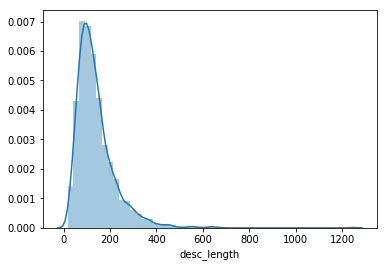

In [94]:
sns.distplot(df.desc_length)
plt.show()

#### Correlations

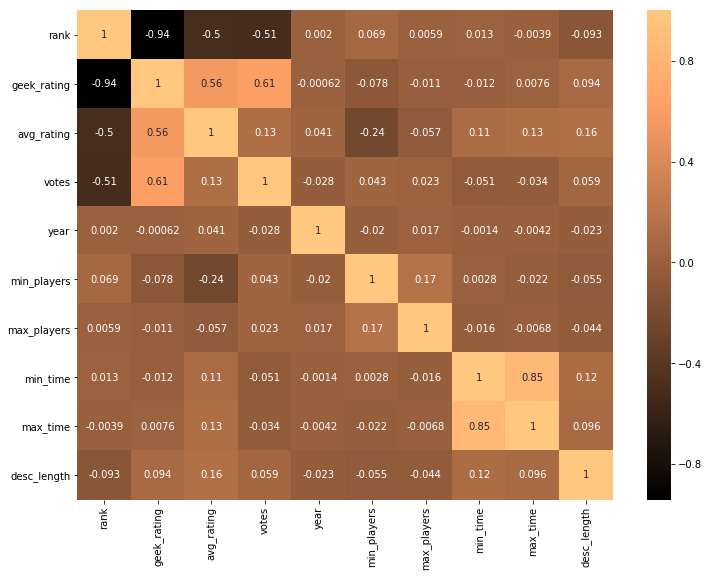

In [96]:
plt.figure(figsize=(12,9))
sns.heatmap(df.reset_index().corr(), annot=True, cmap="copper")
plt.show()

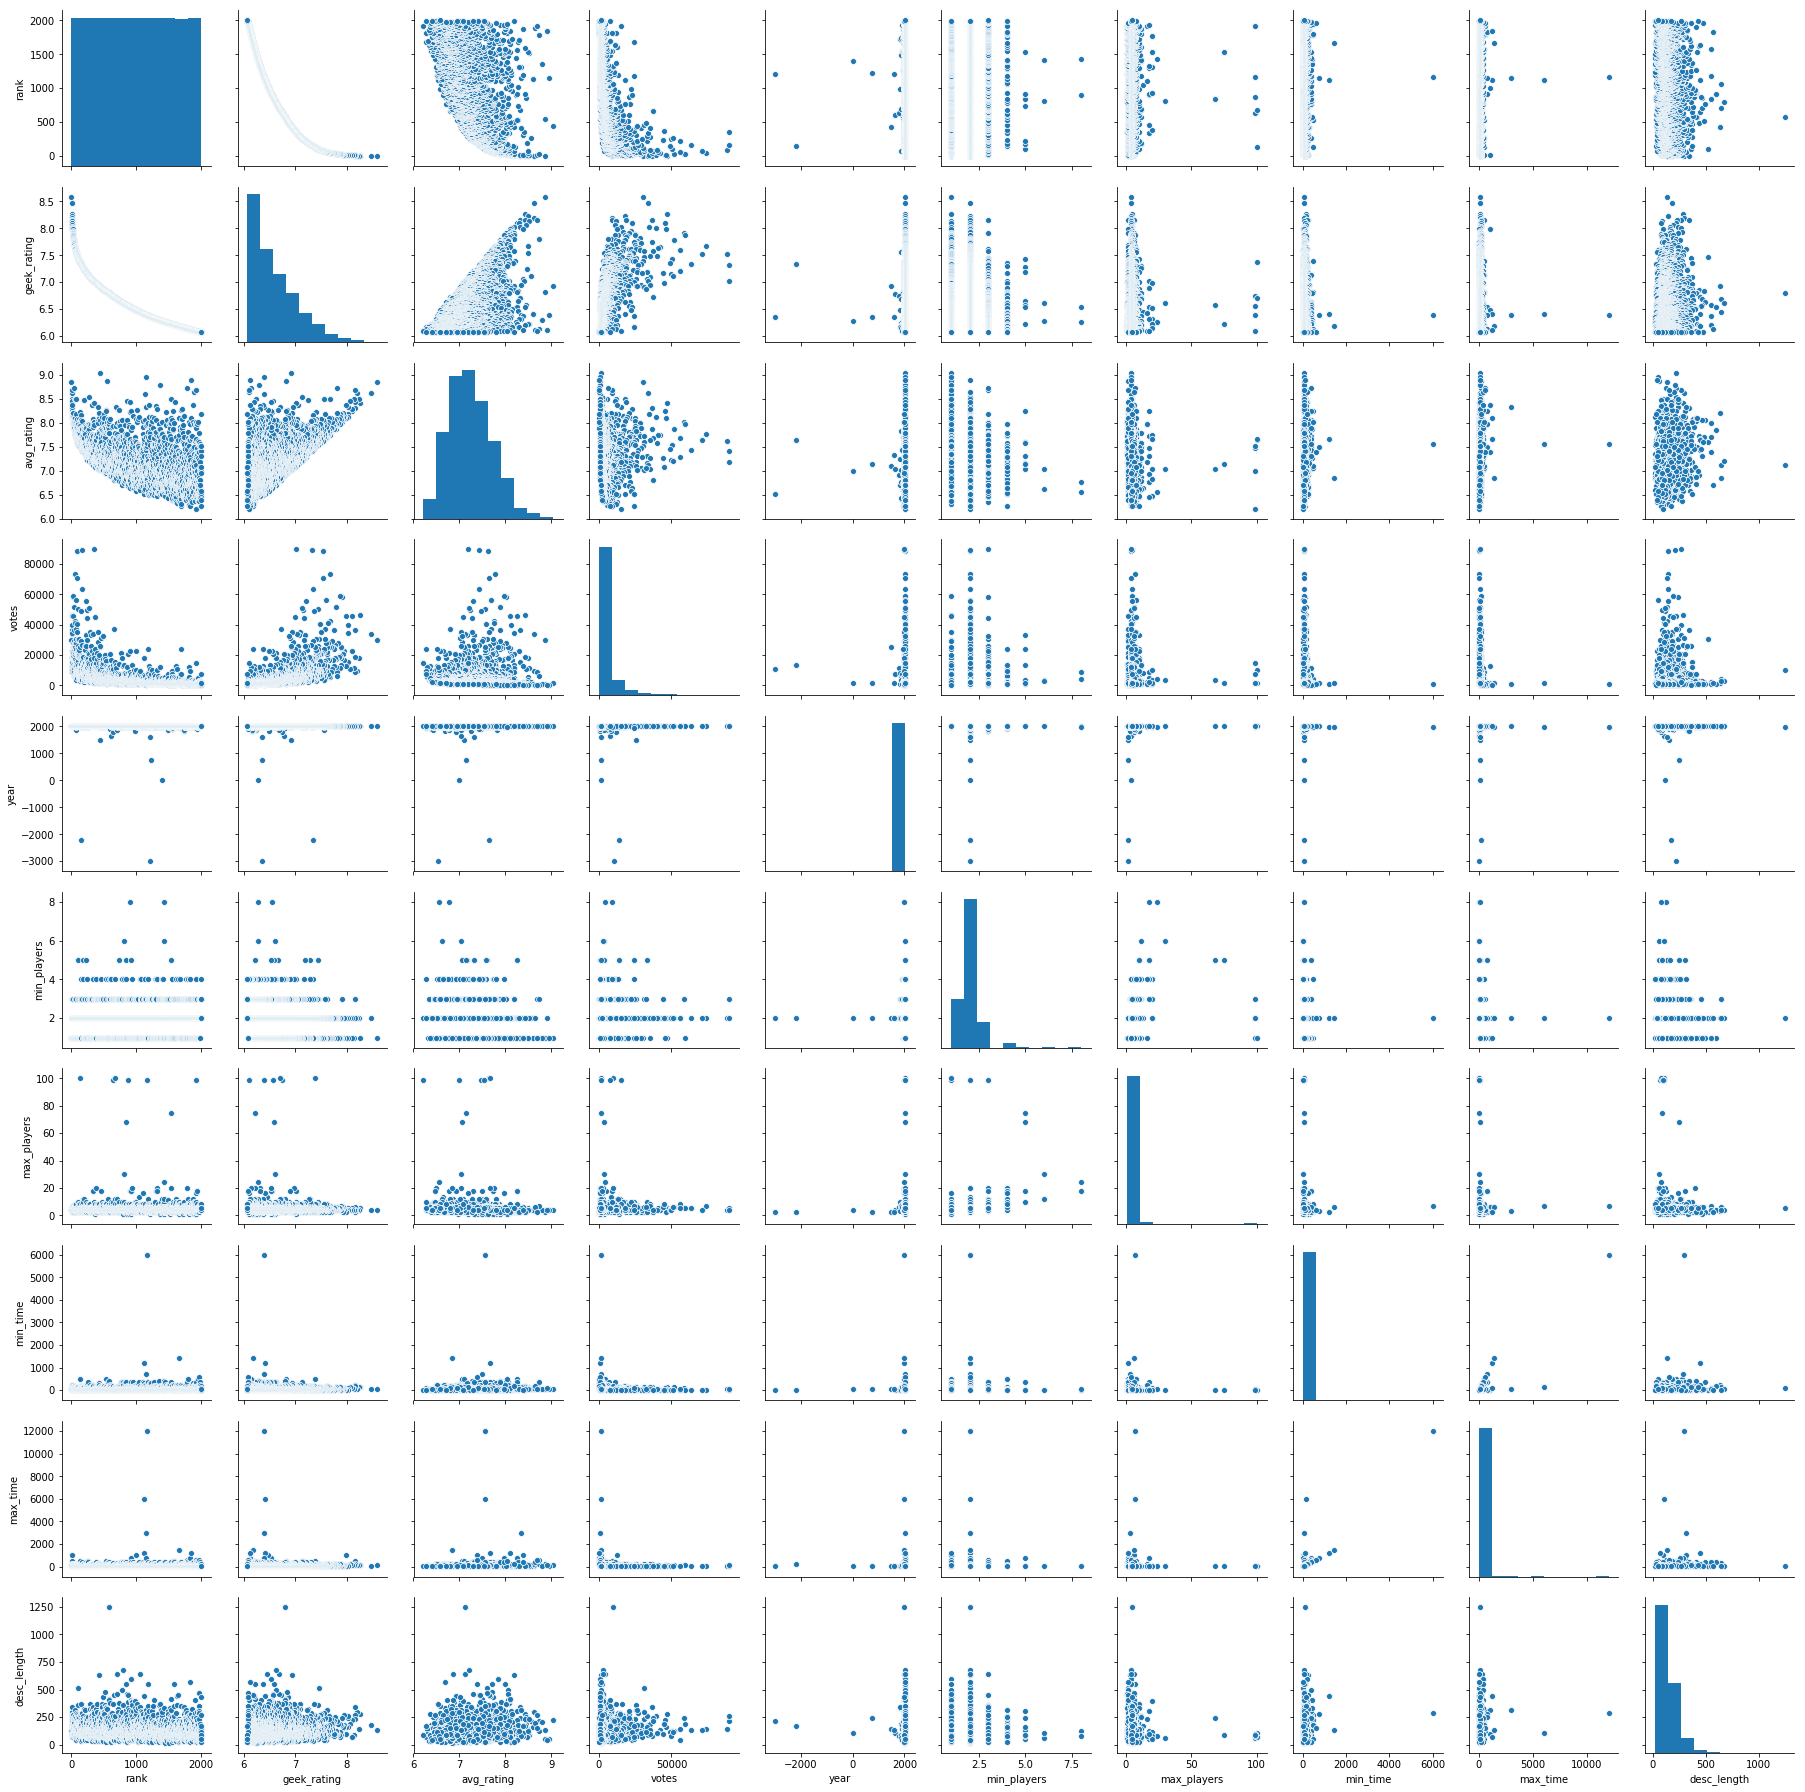

In [97]:
sns.pairplot(df.reset_index())
plt.show()

> There is some correlation with the geek_rating and avg_rating and votes. This makes sense as the geek_rating is a weighted value based on the those two features. 

> There is also a high correlation between min_time and max_time, which also makes sense, as games times typically fall into a relatively small range. 

#### Word cloud explosion

In [105]:
all_words = ' '.join(df.description)

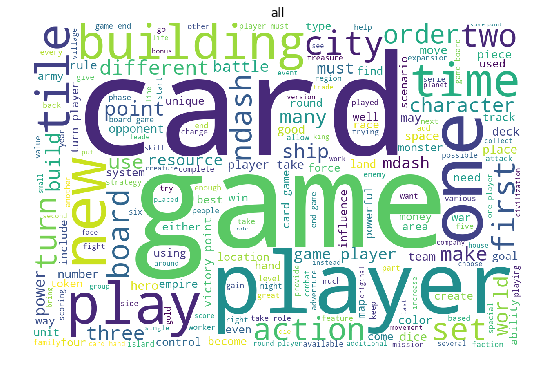

In [106]:
explore.one_word_one_cloud(all_words, "all")

In [138]:
all_words_bigram = pd.Series(nltk.ngrams(all_words.split(), 2)).value_counts().head(100)

In [139]:
from wordcloud import WordCloud

def two_word_one_cloud(words, title):
    data = {k[0] + ' ' + k[1]: v for k, v in words.to_dict().items()}
    cloud= WordCloud(background_color='white', width=1000, height=800).generate_from_frequencies(data)

    plt.figure(figsize=(10, 8))
    plt.imshow(cloud)
    plt.title(title)
    plt.axis("off")
    plt.show()

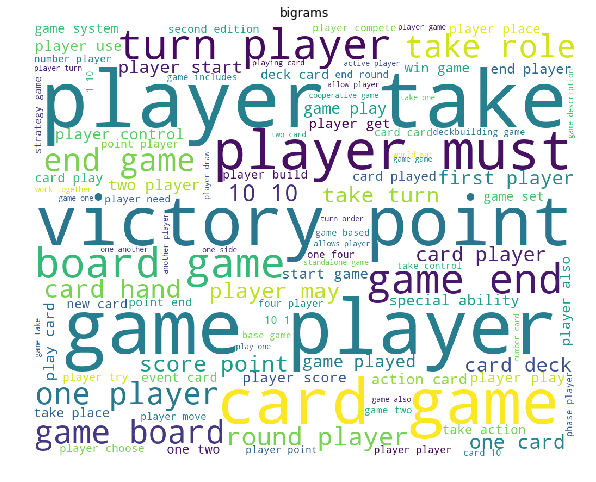

In [140]:
two_word_one_cloud(all_words_bigram, "bigrams")

In [141]:
all_words_trigram = pd.Series(nltk.ngrams(all_words.split(), 3)).value_counts().head(30)

In [142]:
def three_word_two_cloud(words, title):
    data = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in words.to_dict().items()}
    cloud = WordCloud(background_color='white', width=1000, height=800).generate_from_frequencies(data)

    plt.figure(figsize=(10, 8))
    plt.imshow(cloud)
    plt.title(title)
    plt.axis("off")
    plt.show()

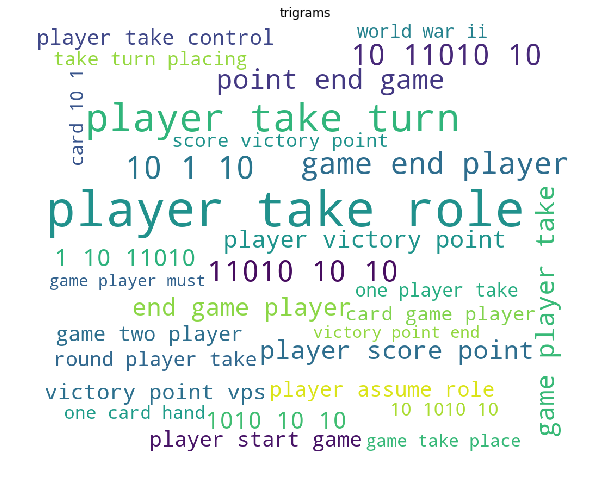

In [143]:
three_word_two_cloud(all_words_trigram, "trigrams")

In [163]:
test_list = df.category.iloc[0]

In [175]:
df.category.iloc[0]

'A'

>ugh. i dont think its a list, but a string instead. 